# We want to analyze customer review

In [1]:
from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
!pip install nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
bt='https://www.amazon.in'
ul='https://www.amazon.in/gp/aw/reviews/B07WDKLDRX/ref=cm_cr_dp_mb_top?ie=UTF8'

In [4]:
cust_name = []   #define list to store Name of the customers
review_title = []
rate = []
review_content = []

In [5]:
tt = 0
while tt == 0:
    page = requests.get(ul)
    while page.ok == False:#if it fails to connect then this loop will be executing continuously until get response from site  
        page = requests.get(ul)
   

    soup = bs(page.content,'html.parser')
    soup.prettify()       #Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        ul = bt + A
    except:
        break

In [6]:
len(review_title)

1852

In [7]:
len(review_content)

1852

In [8]:
len(rate)

1852

In [9]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [10]:
df = pd.DataFrame()

In [11]:
df['Review Title'] = review_title
df['Rating'] = rate
df['Reviews'] = review_content

In [12]:
df.head(10)

,Review Title,Rating,Reviews
0,Intrusive Data collection Apps- can't be disabled,2.0 out of 5 stars,Read other reviews for hardware and performanc...
1,Flagship Killer,5.0 out of 5 stars,Performance-5/5Battery Backup-5/5Fast charging...
2,Worthy real flagship killer replacing oneplus,5.0 out of 5 stars,I have been using Neo 6 for last two days and ...
3,Just one word awesome ☺️,5.0 out of 5 stars,The media could not be loa...
4,"Honest opinion on this phone is that, Iqoo is ...",5.0 out of 5 stars,"As an Ios user, I am genuinely speaking that a..."
5,Waste of money plz check my review video i jus...,1.0 out of 5 stars,The media could not be loa...
6,"Omg iQOO ♥️, you did it.🤤🖖💪🏻💪🏻💪🏻 You made a be...",5.0 out of 5 stars,Maximum Power and maximum winnn...1. Commandin...
7,Value for money product,5.0 out of 5 stars,Overall very good phone in this price point. I...
8,Best budget phone in this range,5.0 out of 5 stars,I've researched so many phones in a while and ...
9,Let's bust some myth,4.0 out of 5 stars,I ordered this phone based on specs it was pro...


In [14]:
df.to_csv(r'fill.csv',index = True)

In [15]:
ta = pd.read_csv("fill.csv",index_col=[0])

In [16]:
data = pd.read_csv("fill.csv",index_col=[0])

In [17]:
data.dtypes

Review Title    object
Rating          object
Reviews         object
dtype: object

In [18]:
data['Rating'] = [titles.rstrip(' out of 5 stars') for titles in data['Rating']]
data['Rating']

0       2.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
1847    5.0
1848    5.0
1849    5.0
1850    5.0
1851    2.0
Name: Rating, Length: 1852, dtype: object

In [19]:
data['Rating'].value_counts(normalize=True)*100

5.0    61.447084
4.0    22.624190
1.0     6.425486
3.0     5.939525
2.0     3.563715
Name: Rating, dtype: float64

In [20]:
ratings=data.groupby(['Rating']).count()
ratings

,Review Title,Reviews
Rating,,
1.0,119,117
2.0,66,63
3.0,110,109
4.0,419,389
5.0,1138,1057


Text(0, 0.5, 'Count')

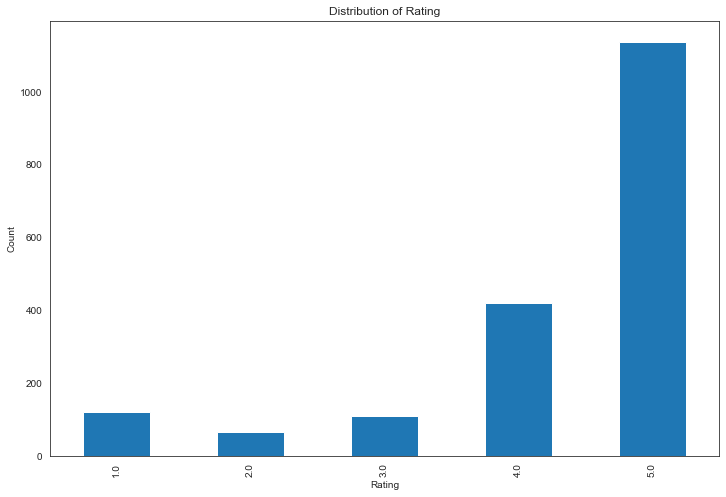

In [21]:
plt.figure(figsize=(12,8))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

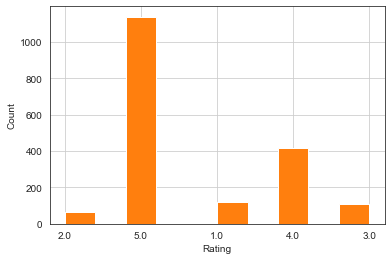

In [22]:
data.Rating.hist()
data.Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')

In [23]:
data.iloc[:,[2]]

,Reviews
0,Read other reviews for hardware and performanc...
1,Performance-5/5Battery Backup-5/5Fast charging...
2,I have been using Neo 6 for last two days and ...
3,The media could not be loa...
4,"As an Ios user, I am genuinely speaking that a..."
...,...
1847,Display and performance and charging🔋⚡ speed i...
1848,Best PUBG gameplay and graphics (90 fps) witho...
1849,The performance is great 👍 10/10Camera is love...
1850,NaN


In [24]:
Reviews=data.iloc[:,[2]]

In [25]:
Reviews.shape

(1852, 1)

In [26]:
Reviews.describe()

,Reviews
count,1735
unique,1640
top,Good
freq,21


In [27]:
Reviews.dtypes

Reviews    object
dtype: object

In [28]:
# removing customer name and reviw title column as they have not that significance in output##
data.drop(["Review Title"],axis=1,inplace=True)


In [30]:
data.head(10)

,Rating,Reviews
0,2.0,Read other reviews for hardware and performanc...
1,5.0,Performance-5/5Battery Backup-5/5Fast charging...
2,5.0,I have been using Neo 6 for last two days and ...
3,5.0,The media could not be loa...
4,5.0,"As an Ios user, I am genuinely speaking that a..."
5,1.0,The media could not be loa...
6,5.0,Maximum Power and maximum winnn...1. Commandin...
7,5.0,Overall very good phone in this price point. I...
8,5.0,I've researched so many phones in a while and ...
9,4.0,I ordered this phone based on specs it was pro...


In [31]:
data.dropna(inplace=True)

In [32]:
#Cleaning the text input for betting understanding of Machine..##

#Converting all review into Lowercase..###
data['Reviews']= data['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [33]:
# removing punctuation from review..#
import string
data['Reviews']=data['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [34]:
# Remove Numbers from review
data['Reviews']=data['Reviews'].str.replace('[0-9]','')

C:\Users\DELL\AppData\Local\Temp/ipykernel_11188/1646588796.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews']=data['Reviews'].str.replace('[0-9]','')


In [35]:
# removing all stopwords(english)
from nltk.corpus import stopwords

In [36]:
stop_words=stopwords.words('english')

In [37]:
data['Reviews']=data['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [38]:
data

,Rating,Reviews
0,2.0,read reviews hardware performance privacythis ...
1,5.0,performancebattery backupfast chargingdisplayc...
2,5.0,using neo last two days love iti regular user ...
3,5.0,media could loaded price range best trust plea...
4,5.0,ios user genuinely speaking aboth camera perfo...
...,...,...
1846,5.0,நல்ல இருக்கு நம்பி வாங்கலாம்
1847,5.0,display performance charging🔋⚡ speed impressiv...
1848,5.0,best pubg gameplay graphics fps without lag re...
1849,5.0,performance great 👍 camera lovely 😍charging sp...


In [39]:
from textblob import Word
data['Reviews']= data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Reviews']= data['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [42]:
data['Reviews'].head(10)

0    read review hardware performance privacythis s...
1    performancebattery backupfast chargingdisplayc...
2    using neo last two day love iti regular user p...
3    medium could loaded price range best trust ple...
4    io user genuinely speaking aboth camera perfor...
5    medium could loaded recommended gaming coustom...
6    maximum power maximum winnn commanding sd alre...
7    overall good phone price point checked oneplus...
8    ive researched many phone finally ordered mix ...
9    ordered phone based spec providing later saw f...
Name: Reviews, dtype: object

In [43]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['Reviews'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aa  aacha  aap  aapka  aata  abd  ability  able  abnormal  aboth  ...  \
0      0      0    0      0     0    0        0     0         0      0  ...   
1      0      0    0      0     0    0        0     0         0      0  ...   
2      0      0    0      0     0    0        0     0         0      0  ...   
3      0      0    0      0     0    0        0     0         0      0  ...   
4      0      0    0      0     0    0        0     0         0      1  ...   
...   ..    ...  ...    ...   ...  ...      ...   ...       ...    ...  ...   
1730   0      0    0      0     0    0        0     0         0      0  ...   
1731   0      0    0      0     0    0        0     0         0      0  ...   
1732   0      0    0      0     0    0        0     0         0      0  ...   
1733   0      0    0      0     0    0        0     0         0      0  ...   
1734   0      0    0      0     0    0        0     0         0      0  ...   

      शत  सकत  सभ  सल  हफ  हल  இர  கல  நம  நல  
0  

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


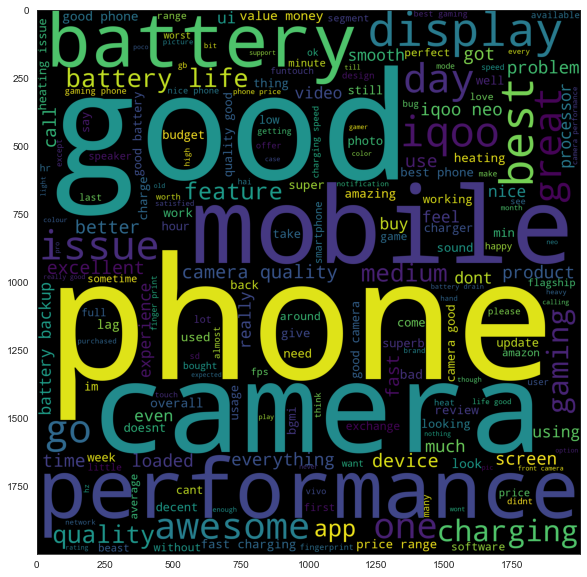

In [44]:
Review_wordcloud = ' '.join(data['Reviews'])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

# Removing Punctuation
The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [45]:
data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')
data['Reviews'].head()

C:\Users\DELL\AppData\Local\Temp/ipykernel_11188/2640507917.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')


0    read review hardware performance privacythis s...
1    performancebattery backupfast chargingdisplayc...
2    using neo last two day love iti regular user p...
3    medium could loaded price range best trust ple...
4    io user genuinely speaking aboth camera perfor...
Name: Reviews, dtype: object

# Common word removal
Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words from our text data First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

In [46]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:10]
freq

phone          890
good           831
camera         623
battery        483
best           333
performance    297
quality        290
mobile         254
iqoo           235
charging       230
dtype: int64

Now, let’s remove these words as their presence will not of any use in classification of our text data.

In [54]:
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Reviews'].head(10)

0    read review hardware privacythis software come...
1    performancebattery backupfast chargingdisplayc...
2    using neo last two day love iti regular user p...
3    medium could loaded price range trust please i...
4    io user genuinely speaking aboth gaming experi...
5    medium could loaded recommended gaming coustom...
6    maximum power maximum winnn commanding sd alre...
7    overall price point checked oneplus nord ce we...
8    ive researched many finally ordered mix going ...
9    ordered based spec providing later saw flood n...
Name: Reviews, dtype: object

Rare words removal

Similarly, just as we removed the most common words, this time let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts

In [48]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[-10:]
freq

intervention       1
begining           1
mejor              1
activeotherwise    1
liquide            1
damagei            1
vedios             1
waterproof         1
goone              1
hanf               1
dtype: int64

In [49]:
from textblob import TextBlob
data['Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    read review hardware privacythis software come...
1    performancebattery backupfast chargingdisplayc...
2    using neo last two day love it regular user pr...
3    medium could loaded price range trust please i...
4    to user genuinely speaking both gazing experie...
5    medium could loaded recommended gazing custome...
6    maximum power maximum wine commanding sd alrea...
7    overall price point checked onerous word ce we...
8    give researches many finally ordered mix going...
9    ordered based speck providing later saw flood ...
Name: Reviews, dtype: object

# Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our reviews into a blob and then converted them into a series of words.

In [50]:
TextBlob(data['Reviews'][0]).words

WordList(['read', 'review', 'hardware', 'privacythis', 'software', 'come', 'default', 'apps', 'can', 'not', 'uninstalled', 'go', 'deep', 'setting', 'manually', 'remove', 'permission', 'app', 'software', 'update', 'something', 'simple', 'launching', 'game', 'enable', 'againthe', 'privacy', 'policy', 'clearly', 'state', 'data', 'go', 'china', 'linked', 'device', 'guidimeiip', 'address', 'etc', 'exact', 'line', 'crossborder', 'informationtransmissionyour', 'use', 'application', 'indicates', 'agree', 'iq', 'may', 'transfer', 'information', 'area', 'country', 'region', 'according', 'applicable', 'lawsapps', 'browsereasy', 'sharegamespaceiqoocomiqoo', 'cloud'])

In [51]:
TextBlob(data['Reviews'][1]).words

WordList(['performancebattery', 'backupfast', 'chargingdisplaycameradesignwill', 'edit', 'review', 'week', 'usage'])

# Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library

In [52]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Reviews'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    read review hardwar privacythi softwar come de...
1    performancebatteri backupfast chargingdisplayc...
2    use neo last two day love iti regular user pri...
3    medium could load price rang trust pleas ignor...
4    io user genuin speak aboth game experi better ...
5    medium could load recommend game coustom care ...
6    maximum power maximum winnn command sd alreadi...
7    overal price point check oneplu nord ce well t...
8    ive research mani final order mix go deliv jun...
9    order base spec provid later saw flood neg rev...
Name: Reviews, dtype: object

# Lemmatization
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [55]:
from textblob import Word
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Reviews'].head(10)

0    read review hardware privacythis software come...
1    performancebattery backupfast chargingdisplayc...
2    using neo last two day love iti regular user p...
3    medium could loaded price range trust please i...
4    io user genuinely speaking aboth gaming experi...
5    medium could loaded recommended gaming coustom...
6    maximum power maximum winnn commanding sd alre...
7    overall price point checked oneplus nord ce we...
8    ive researched many finally ordered mix going ...
9    ordered based spec providing later saw flood n...
Name: Reviews, dtype: object

# Advance Text Processing
Up to this point, we have done all the basic pre-processing steps in order to clean our data. Now, we can finally move on to extracting features using NLP techniques.

N-grams

N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

In [56]:
TextBlob(data['Reviews'][0]).ngrams(2)

[WordList(['read', 'review']),
 WordList(['review', 'hardware']),
 WordList(['hardware', 'privacythis']),
 WordList(['privacythis', 'software']),
 WordList(['software', 'come']),
 WordList(['come', 'default']),
 WordList(['default', 'apps']),
 WordList(['apps', 'can']),
 WordList(['can', 'not']),
 WordList(['not', 'uninstalled']),
 WordList(['uninstalled', 'go']),
 WordList(['go', 'deep']),
 WordList(['deep', 'setting']),
 WordList(['setting', 'manually']),
 WordList(['manually', 'remove']),
 WordList(['remove', 'permission']),
 WordList(['permission', 'app']),
 WordList(['app', 'software']),
 WordList(['software', 'update']),
 WordList(['update', 'something']),
 WordList(['something', 'simple']),
 WordList(['simple', 'launching']),
 WordList(['launching', 'game']),
 WordList(['game', 'enable']),
 WordList(['enable', 'againthe']),
 WordList(['againthe', 'privacy']),
 WordList(['privacy', 'policy']),
 WordList(['policy', 'clearly']),
 WordList(['clearly', 'state']),
 WordList(['state', 

# Term frequency
Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [57]:
tf1 = (data['Reviews'][1:10]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,performancebattery,1.0
1,backupfast,1.0
2,chargingdisplaycameradesignwill,1.0
3,edit,1.0
4,review,5.0
...,...,...
467,lagged,1.0
468,background,1.0
469,apps,1.0
470,running,1.0


# Inverse Document Frequency
The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

In [58]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Reviews'].str.contains(word)])))
tf1

,words,tf,idf
0,performancebattery,1.0,6.360150
1,backupfast,1.0,5.849325
2,chargingdisplaycameradesignwill,1.0,7.458763
3,edit,1.0,4.973856
4,review,5.0,3.210267
...,...,...,...
467,lagged,1.0,7.458763
468,background,1.0,4.893813
469,apps,1.0,3.587562
470,running,1.0,5.667003


# Term Frequency – Inverse Document Frequency (TF-IDF)
TF-IDF is the multiplication of the TF and IDF which we calculated above.

In [59]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,performancebattery,1.0,6.360150,6.360150
1,backupfast,1.0,5.849325,5.849325
2,chargingdisplaycameradesignwill,1.0,7.458763,7.458763
3,edit,1.0,4.973856,4.973856
4,review,5.0,3.210267,16.051337
...,...,...,...,...
467,lagged,1.0,7.458763,7.458763
468,background,1.0,4.893813,4.893813
469,apps,1.0,3.587562,3.587562
470,running,1.0,5.667003,5.667003


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['Reviews'])

data_vect

<1735x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 13993 stored elements in Compressed Sparse Row format>

# Bag of Words
Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

For implementation, sklearn provides a separate function for it as shown below

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Reviews'])
data_bow

<1735x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 16042 stored elements in Compressed Sparse Row format>

# Sentiment Analysis
If you recall, our problem was to detect the sentiment of the tweet. So, before applying any ML/DL models (which can have a separate feature detecting the sentiment using the textblob library),let’s check the sentiment of the first few reviews.

In [62]:
data['Reviews'][:10].apply(lambda x: TextBlob(x).sentiment)

0     (-0.009999999999999998, 0.3580952380952381)
1                                      (0.0, 0.0)
2        (0.4041666666666667, 0.4846153846153846)
3       (0.12121212121212123, 0.2939393939393939)
4       (0.31354166666666666, 0.5740740740740741)
5     (-0.07857142857142858, 0.40714285714285714)
6        (0.4210215053763441, 0.5572043010752689)
7    (-0.047619047619047616, 0.35714285714285715)
8       (0.24125000000000005, 0.5400000000000001)
9      (0.03414377289377288, 0.47382326007325987)
Name: Reviews, dtype: object

# Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

In [63]:
data['sentiment'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Reviews','sentiment']].head()

,Reviews,sentiment
0,read review hardware privacythis software come...,-0.010000
1,performancebattery backupfast chargingdisplayc...,0.000000
2,using neo last two day love iti regular user p...,0.404167
3,medium could loaded price range trust please i...,0.121212
4,io user genuinely speaking aboth gaming experi...,0.313542


# Word Embeddings
Word Embedding is the representation of text in the form of vectors. The underlying idea here is that similar words will have a minimum distance between their vectors.

Word2Vec models require a lot of text, so either we can train it on our training data or we can use the pre-trained word vectors developed by Google, Wiki, etc.

In [68]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [69]:
from textblob import TextBlob
data['polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Reviews','polarity']].head(5)

,Reviews,polarity
0,read review hardware privacythis software come...,-0.010000
1,performancebattery backupfast chargingdisplayc...,0.000000
2,using neo last two day love iti regular user p...,0.404167
3,medium could loaded price range trust please i...,0.121212
4,io user genuinely speaking aboth gaming experi...,0.313542


In [70]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Rating,Reviews,sentiment,polarity
2,5.0,using neo last two day love iti regular user p...,0.404167,0.404167
3,5.0,medium could loaded price range trust please i...,0.121212,0.121212
4,5.0,io user genuinely speaking aboth gaming experi...,0.313542,0.313542
6,5.0,maximum power maximum winnn commanding sd alre...,0.421022,0.421022
8,5.0,ive researched many finally ordered mix going ...,0.241250,0.241250


In [71]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [72]:
sent_type(data['polarity'])

negative
neutral
positive
positive
positive
negative
positive
negative
positive
positive
positive
neutral
positive
positive
neutral
positive
positive
negative
negative
positive
positive
positive
positive
negative
negative
positive
positive
negative
negative
positive
positive
neutral
positive
negative
positive
negative
positive
negative
negative
neutral
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
neutral
positive
positive
positive
negative
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
neutral
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive

neutral
neutral
positive
negative
positive
neutral
neutral
neutral
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
neutral
negative
positive
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
positive
neutral
negative
negative
neutral
neutral
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
negative
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
negative
neutral
neutral
positive
positive
positive
negative
positive
positive
neutral
positive
positive
positive
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
positive
positive
negative
positive
positive
neutral
positive
positive
neutral
positive
positive
neutral
positive
neutral
neutral
neutral
n